# Hyperbolic geodesic example

We compute the geodesics in the upper half plane model of the hyperbolic plane, in which the metric is
$$
    ds^2 = \frac{dx^2 + dy^2}{y^2}
$$
We do so by minimizing the length
$$
    L = \int \frac{dx}{y} \sqrt{1 + \left(\frac{dy}{dx}\right)^2}
$$
While keeping the points at $x=0$ and $x=1$ fixed at values $y_1$, $y_2$.

In [27]:
import elvet

def geodesic(y_1, y_2):
    def loss(x, y, dy_dx):
        dy_dx = dy_dx[:, 0]

        length = elvet.math.integral((1 + dy_dx**2)**0.5 / y, x)
        bc_loss = (y[0] - y_1)**2 + (y[-1] - y_2)**2

        return length + 1e3 * bc_loss

    domain = elvet.box((0, 1, 100))
    return elvet.minimizer(loss, domain, epochs=40000, lr=0.1)

geodesic_1 = geodesic(0.2, 0.2)
geodesic_2 = geodesic(0.2, 1.0)

 Elvet: Setting optimizer parameter 'lr' to 0.1
 Elvet: epoch = 1, loss = 7.74e+02, elapsed time = 00:00:00
 Elvet: epoch = 10000, loss = 3.37e+00, elapsed time = 00:00:02
 Elvet: epoch = 20000, loss = 3.30e+00, elapsed time = 00:00:04
 Elvet: epoch = 30000, loss = 3.29e+00, elapsed time = 00:00:06
 Elvet: epoch = 40000, loss = 3.29e+00, elapsed time = 00:00:09
 Elvet: Setting optimizer parameter 'lr' to 0.1
 Elvet: epoch = 1, loss = 6.79e+02, elapsed time = 00:00:00
 Elvet: epoch = 10000, loss = 2.82e+00, elapsed time = 00:00:02
 Elvet: epoch = 20000, loss = 2.34e+00, elapsed time = 00:00:05
 Elvet: epoch = 30000, loss = 2.31e+00, elapsed time = 00:00:08
 Elvet: epoch = 40000, loss = 2.31e+00, elapsed time = 00:00:11


## Checks

We plot the solution and compare with the analytical one: the geodesics should be circles centered at the $y=0$ line.

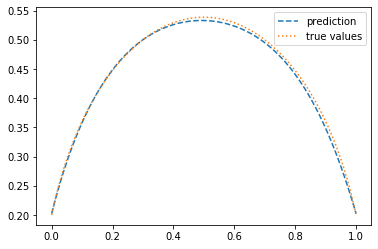

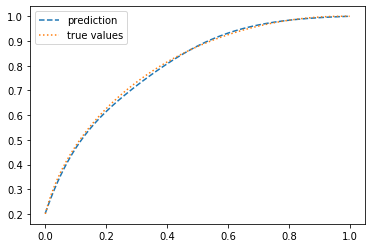

In [28]:
import elvet.plotting

def analytic_geodesic(y_1, y_2):
    x_center = (y_2**2 - y_1**2 + 1) / 2
    radius_sq = x_center**2 + y_1**2
    return lambda x: (radius_sq - (x - x_center)**2)**0.5

elvet.plotting.plot_prediction(geodesic_1, true_function=analytic_geodesic(0.2, 0.2))
elvet.plotting.plot_prediction(geodesic_2, true_function=analytic_geodesic(0.2, 1.0))